In [1]:
import sys, os
from pathlib import Path

sys.path.append(os.path.abspath(Path().resolve().parent/'src'))

In [2]:
from kinematicsrobotics.datahandler import Save, Extract
from kinematicsrobotics.plottingutils import Plot

## Base de dados

In [54]:
ext = Extract()
ext._path_project = os.path.abspath(Path().resolve().parent)

dataset = ext.dataframe(r'src\data\ready\dataset-radius-1cm.csv')
dataset.head(3)

,theta_1,theta_2,theta_3,theta_4,theta_5,p_x,p_y,p_z,roll,pich,yaw
0,0,0,12,0,0,53.213314,-2.477121e-15,2.515179,3.141593,-1.361357,2.752040e-16
1,0,12,12,0,0,53.606657,-1.789652e-15,13.742410,2.378531,-1.570796,7.630613e-01
2,0,12,24,0,0,52.819970,-3.124530e-15,6.257590,3.141593,-1.361357,2.371518e-16


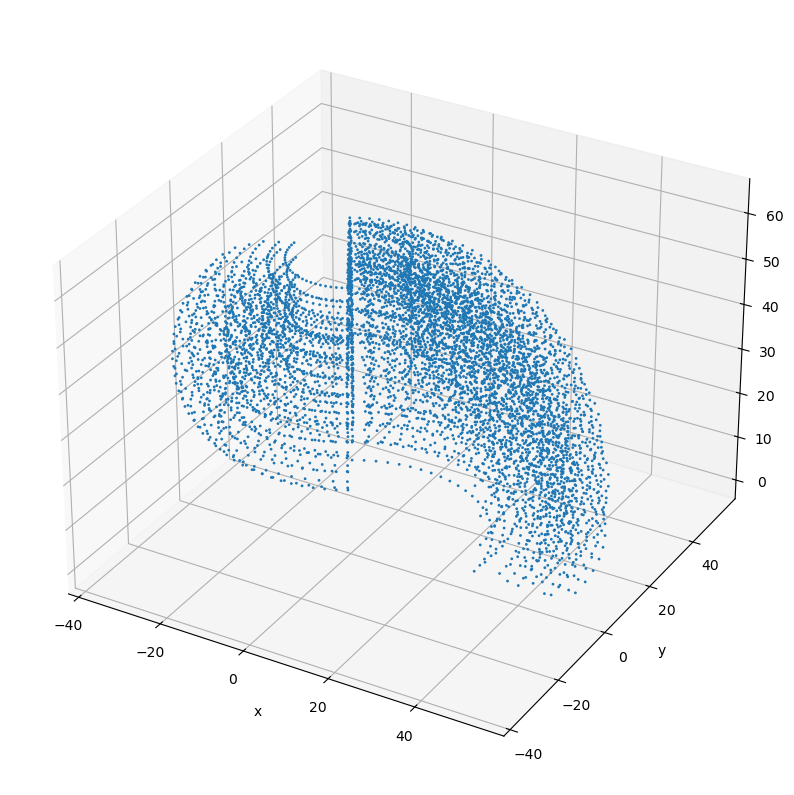

In [55]:
plt = Plot(data = dataset, figsize=(10,30))

plt.scatter3D(labels=['p_x','p_y','p_z'], 
              name_labels=['x','y','z'])

## Clusterização

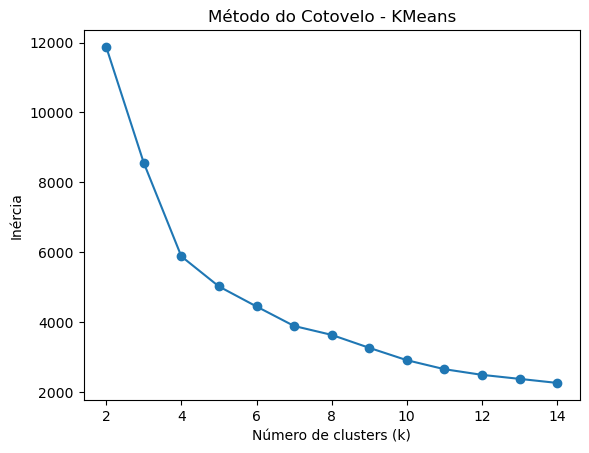

In [80]:
from sklearn.cluster import KMeans
from pandas import DataFrame
import matplotlib.pyplot as plte
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

scaler = StandardScaler()
data_norm = scaler.fit_transform(dataset[['p_x','p_y','p_z']])
k = list(range(2,15))
inertia = []
silhouette = []
for n_clusters in k:
    kmeans = KMeans(n_clusters=n_clusters, 
                    random_state=42,
                    n_init = 'auto'
    )
    kmeans.fit(data_norm)
    inertia.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(data_norm, kmeans.labels_))


data_cust = DataFrame({'k': k,
                       'inertia':inertia,
                       'silhouette': silhouette}
)


plte.plot(data_cust['k'], data_cust['inertia'], marker='o')
plte.xlabel('Número de clusters (k)')
plte.ylabel('Inércia')
plte.title('Método do Cotovelo - KMeans')
plte.show()


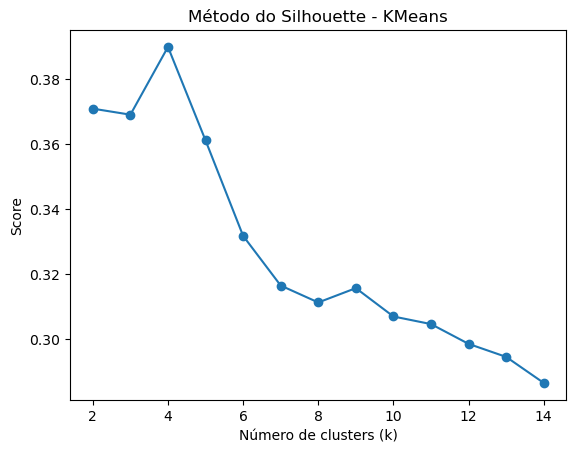

In [82]:
plte.plot(data_cust['k'], data_cust['silhouette'], marker='o')
plte.xlabel('Número de clusters (k)')
plte.ylabel('Score')
plte.title('Método do Silhouette - KMeans')
plte.show()

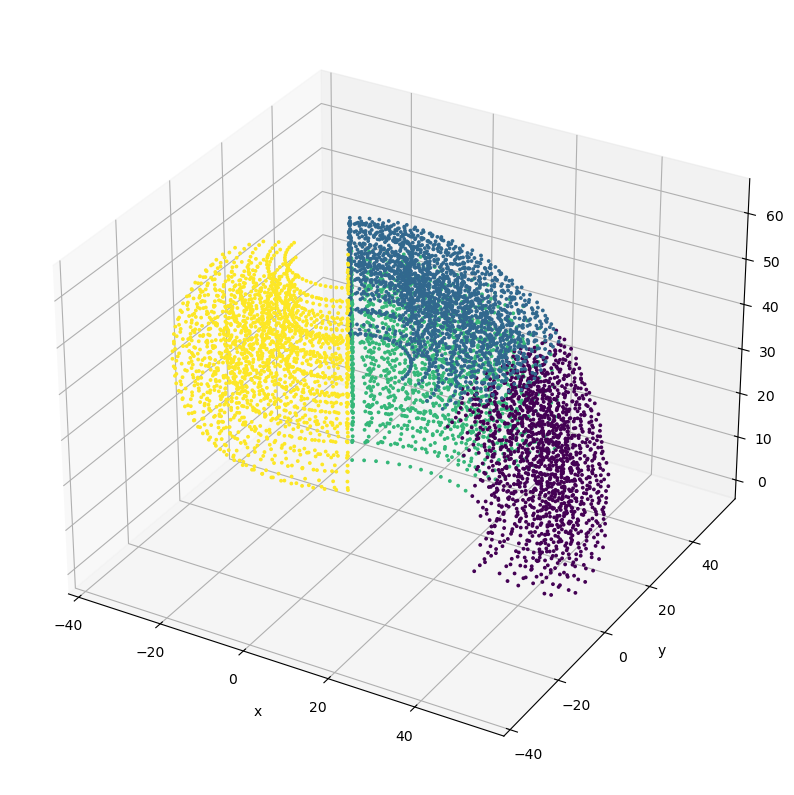

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4, 
                random_state=42,
                n_init = 'auto')

#,'roll','pich','yaw'
kmeans.fit(scaler.fit_transform(dataset[['p_x','p_y','p_z']]))

plt.scatter3D(labels=['p_x','p_y','p_z'], 
              name_labels=['x','y','z'],
              s = 3,
              cmap="viridis",
              alpha=1,
              c = kmeans.labels_)